In [ ]:
#import library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.compose import ColumnTransformer
from math import remainder

# import warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Make DataFrame column view wider
pd.set_option('display.max_colwidth', 200)
#Read file
df = pd.read_csv('F:\Car_Price_Predictions\data\CarPrice_Assignment.csv')

In [3]:
#Drop Car_ID
df.drop('car_ID', axis=1, inplace=True)

In [4]:
#Get Car Name
df['CarName'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [5]:
#Change Typo Car Name
df.replace({'CarName':{'maxda':'mazda', 'Nissan':'nissan', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen'}}, inplace=True)
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [6]:
#define Categorical and Numerical Columns
df1_catCol = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel','enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
df1_numCol = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
              'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# Handling categorical variables
df1 = df.copy() #copy data, protect data if make a mistake not affected main data
#One-Hot Encoding
df1 = pd.get_dummies(df1, columns=df1_catCol, drop_first=True)

In [7]:
#Feature Scaling
scaler = StandardScaler()
df1[df1_numCol] = scaler.fit_transform(df1[df1_numCol])

In [8]:
#Train Model
#Split Dataset
X = df1.drop(['price', 'symboling', 'CarName'], axis=1)
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

# Model Training with Linear Regression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test) #prediction

#Model Training with Random Forest Regressor
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test) #prediction

## Linear Regression

In [10]:
#Model Training with Linear Regression
prediction_lr=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_lr,'Difference':y_test-y_pred_lr})
prediction_lr.head()

,Actual Value,Predicted Value,Difference
15,30760.000,28709.892208,2050.107792
9,17859.167,20249.665458,-2390.498458
100,9549.000,10764.255756,-1215.255756
132,11850.000,12564.330717,-714.330717
68,28248.000,27600.920006,647.079994


<Axes: >

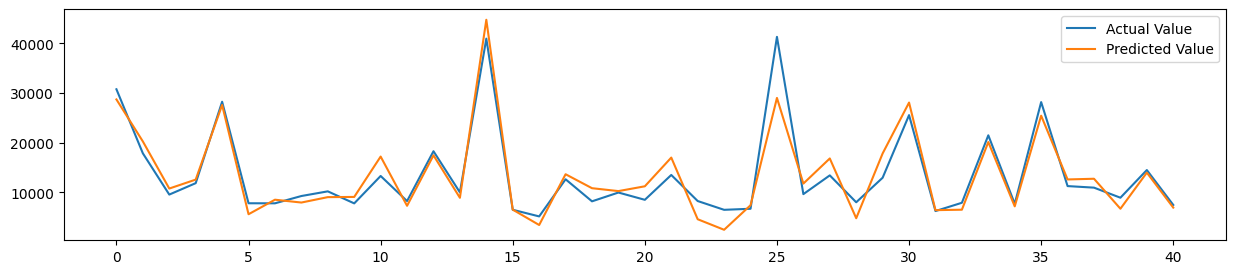

In [11]:
#compare actual and prediction value
compare=pd.DataFrame({'Actual Value':y_test.values.flatten(),'Predicted Value':y_pred_lr})
compare.head(50).plot(kind='line',figsize=(15,3))

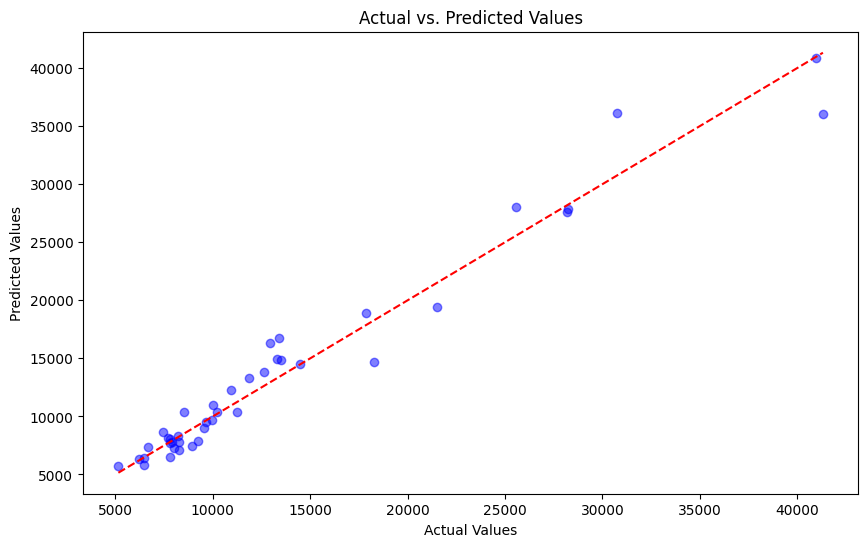

In [12]:
#Actual vs Predicted Values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfr
            , c='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

## Random Forest Regression

In [13]:
prediction=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_rfr,'Difference':y_test-y_pred_rfr})
prediction.head()

,Actual Value,Predicted Value,Difference
15,30760.000,36106.460,-5346.460
9,17859.167,18880.620,-1021.453
100,9549.000,9017.700,531.300
132,11850.000,13288.085,-1438.085
68,28248.000,27816.345,431.655


<Axes: >

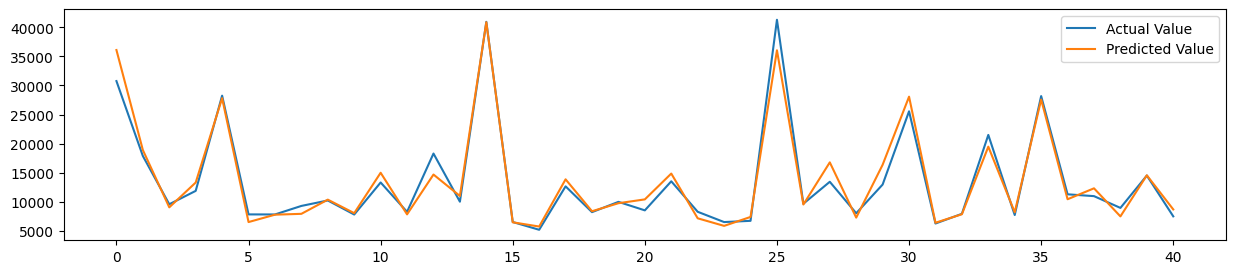

In [14]:
#compare actual and prediction value
compare=pd.DataFrame({'Actual Value':y_test.values.flatten(),'Predicted Value':y_pred_rfr})
compare.head(50).plot(kind='line',figsize=(15,3))

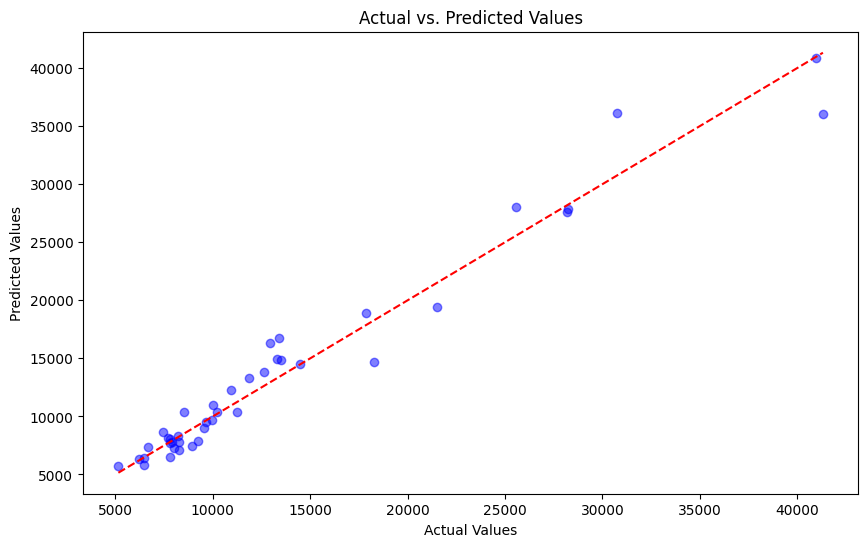

In [15]:
#Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfr
            , c='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

## Evaluation


In [16]:
#Compare Matrix Evaluation
r2_lr = lr.score(X_test, y_test)
r2_rfr = rfr.score(X_test, y_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))

models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor'],
    'R2 Score': [r2_lr, r2_rfr],
    'MAE': [mae_lr, mae_rfr],
    'RMSE': [rmse_lr, rmse_rfr]
})
print(models)

                     Model  R2 Score          MAE         RMSE
0        Linear Regression  0.893109  2089.575687  2904.893837
1  Random Forest Regressor  0.959712  1222.926136  1783.390814


## Feature Importances


In [17]:
#Get Top 10 Features Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rfr.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.head(10)

,Feature,Importance
5,enginesize,0.588913
4,curbweight,0.251697
12,highwaympg,0.067613
9,horsepower,0.016319
2,carwidth,0.013826
1,carlength,0.011780
10,peakrpm,0.007591
11,citympg,0.006682
0,wheelbase,0.005637
7,stroke,0.004915


## Hyperparameter Tuning

In [20]:
# Define categorical and numerical columns
df1_catCol = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel','enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
df1_numCol = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
              'horsepower', 'peakrpm', 'citympg', 'highwaympg']


# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), df1_numCol),
        ('cat', OneHotEncoder(handle_unknown='ignore'), df1_catCol)
    ],
    remainder='passthrough' # Keep other columns (like 'CarName' and 'symboling' if not dropped earlier)
)


# Define the model
rfr_tuning = RandomForestRegressor(random_state=1)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', rfr_tuning)])

# Define a reduced parameter grid
hyperparam_space_rfr = {
    'model__n_estimators': [100, 150, 200], # Reduced number of trees
    'model__max_depth': [5, 10, 15, 20], # Reduced max depth values
    'model__min_samples_split': [2, 5, 10], # Add min_samples_split
    'model__min_samples_leaf': [1, 2, 4], # Add min_samples_leaf
    'model__max_features': ['sqrt', 'log2'], # Add max_features
    'model__bootstrap': [True, False] # Add bootstrap
}


# Define cross-validation
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter Tuning using GridSearchCV
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=hyperparam_space_rfr,
                           cv=crossval,
                           scoring='r2', # Use r2 as the scoring metric
                           n_jobs=-1)

# Split data *after* defining the pipeline
X = df.drop(['price', 'symboling', 'CarName'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['wheelbase',
                                                                          'carlength',
                                                                          'carwidth',
                                                                          'carheight',
                                                                          'curbweight',
                                                                          'enginesize',
                                                                          'boreratio',
                                                                          'stroke',
                                                                          'compressionratio',
                                                                          'horsepower',
                                                                          'peakrpm',
                                                                          'citympg',
                                                                          'highwaympg']),
                                                                        ('ca...
                                                                          'enginelocation',
                                                                          'enginetype',
                                                                          'cylindernumber',
                                                                          'fuelsystem'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__max_depth': [5, 10, 15, 20],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 150, 200]},
             scoring='r2')

In [22]:
# Use the best estimator from GridSearchCV for evaluation
best_rfr_tuning_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_rfr_tuning = best_rfr_tuning_model.predict(X_test)

#save best r2, rmse, and mae value after tuning
r2_rfr_tuning = best_rfr_tuning_model.score(X_test, y_test)
mae_rfr_tuning = mean_absolute_error(y_test, y_pred_rfr_tuning)
rmse_rfr_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rfr_tuning))

#Print score after tuning
score_after_tuning=pd.DataFrame({'Model':['Random Forest Regressor Tuning'],'R2 Score':[r2_rfr_tuning],'MAE':[mae_rfr_tuning],'RMSE':[rmse_rfr_tuning]})
print(score_after_tuning)

                            Model  R2 Score          MAE         RMSE
0  Random Forest Regressor Tuning  0.921444  1475.459123  2490.292895


In [23]:
#save model
import pickle
filename = 'model_rfr_tuning.pkl'
pickle.dump(best_rfr_tuning_model, open(filename, 'wb'))

In [25]:
#load model
filename = 'model_rfr_tuning.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

In [26]:
# Create a sample dataframe with values for numerical and categorical features
sample_data = {
    'wheelbase': [95.0],
    'carlength': [170.0],
    'carwidth': [65.0],
    'carheight': [55.0],
    'curbweight': [2500],
    'enginesize': [120],
    'boreratio': [3.3],
    'stroke': [3.2],
    'compressionratio': [9.0],
    'horsepower': [100],
    'peakrpm': [5000],
    'citympg':[25],
    'highwaympg': [30],
    'fueltype': ['gas'],
    'aspiration': ['std'],
    'doornumber': ['four'],
    'carbody': ['sedan'],
    'drivewheel': ['fwd'],
    'enginelocation': ['front'],
    'enginetype': ['ohc'],
    'cylindernumber': ['four'],
    'fuelsystem': ['mpfi']
}
sample_df = pd.DataFrame(sample_data)

# Make prediction with the loaded model
# Since the pipeline now includes preprocessing, we can pass the raw sample_df
prediction_new_sample = loaded_model.predict(sample_df)

# Output the prediction
print(f"Price Prediction for the new sample: {prediction_new_sample[0]}")

Price Prediction for the new sample: 9963.325
